# KNN Algoritması Tutorial

* import dataset
* datasetin tanımı
* dataset görselleştirme
* knn algoritması ne demek
* sklearn with knn
* odev



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data=pd.read_csv("data.csv")

In [30]:
data.drop(["id","Unnamed: 32"],axis= 1, inplace= True)
data.head()
#malignant = M kotu huylu tumor
#bening = B    iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
M= data[data.diagnosis == "M"]
B= data[data.diagnosis == "B"]

In [32]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
diagnosis                  212 non-null object
radius_mean                212 non-null float64
texture_mean               212 non-null float64
perimeter_mean             212 non-null float64
area_mean                  212 non-null float64
smoothness_mean            212 non-null float64
compactness_mean           212 non-null float64
concavity_mean             212 non-null float64
concave points_mean        212 non-null float64
symmetry_mean              212 non-null float64
fractal_dimension_mean     212 non-null float64
radius_se                  212 non-null float64
texture_se                 212 non-null float64
perimeter_se               212 non-null float64
area_se                    212 non-null float64
smoothness_se              212 non-null float64
compactness_se             212 non-null float64
concavity_se               212 non-null float64
concave points_se          212 n

In [11]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
diagnosis                  357 non-null object
radius_mean                357 non-null float64
texture_mean               357 non-null float64
perimeter_mean             357 non-null float64
area_mean                  357 non-null float64
smoothness_mean            357 non-null float64
compactness_mean           357 non-null float64
concavity_mean             357 non-null float64
concave points_mean        357 non-null float64
symmetry_mean              357 non-null float64
fractal_dimension_mean     357 non-null float64
radius_se                  357 non-null float64
texture_se                 357 non-null float64
perimeter_se               357 non-null float64
area_se                    357 non-null float64
smoothness_se              357 non-null float64
compactness_se             357 non-null float64
concavity_se               357 non-null float64
concave points_se          357 

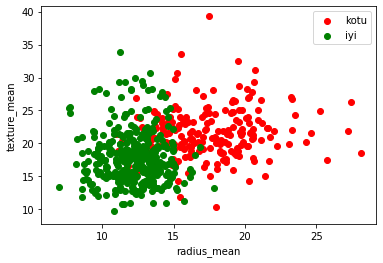

In [33]:
#scatter plot
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="kotu")
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="iyi")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [34]:
data.diagnosis= [1 if each == "M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

In [35]:
#normalization
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [36]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=1)

In [37]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)


In [39]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [41]:
print("{} nn score: {}".format(3,knn.score(x_test,y_test)))

3 nn score: 0.9532163742690059


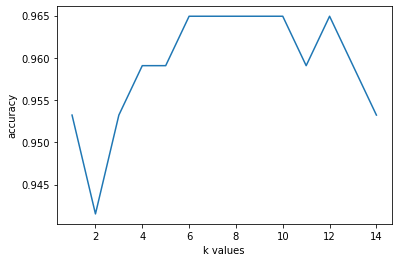

In [43]:
#fing k value

score_list=[]
for each in range(1,15):
    knn2= KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()
    


# conclusion
* k value eğer 8 değerine sahip ise benim test sonuçlarım en iyi değeri veriyor.